In [1]:
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency
import seaborn as sns
from seaborn import pairplot
# from seaborn import distplot
# from seaborn import boxplot

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
df_data = pd.read_csv('orange_small_churn_data.train')
df_labels = pd.read_csv('orange_small_churn_labels.train', names=['Label'], header=None)

In [3]:
df_data['Label'] = df_labels.Label
df_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [6]:
dinfo = {-1: 'не отток', 1: 'отток'}
for i, v in  (df_labels['Label'].value_counts() / df_labels.shape[0]).items():
    print('Доля класса {:<8}: {:.3f}'.format(dinfo[i], v))

Доля класса не отток: 0.926
Доля класса отток   : 0.074


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [7]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#### Из материалов лекции:
Для пар признаков, один из которых непрерывный, а другой — категориальный, вообще не
нужно считать никакой коэффициент корреляции.
Мерой силы взаимосвязи между X1 и X2 может служить просто разность этих математических ожиданий:  
E (X1 | X2 = 1) − E (X1 | X2 = 0)  
Эта величина не нормированная, она может меняться в любом диапазоне, от −∞ до +∞. Однако её гораздо легче интерпретировать, чем коэффициент корреляции, который можно вычислить на такой паре выборок.

In [8]:
# в которых все значения NaN.
df_tmp = df_data.iloc[:, list(range(0, 190)) + [-1]].dropna(axis=1, how='all')
df_tmp.info()

# Посмотрим на характеристики целочисленных параметров, у которых
# минимальное значение равно 25%, равно 50% и равно 75% значениям
# вряд ли такие параметры будут информативны, хотя разница мат. ожиданий
# у них может быть большая, и будет решено, что они сильно коррелированны с целевым
# значением.
# Как видно, таких переменных - 46
ser_desc=df_tmp.describe().transpose().drop('Label')
ser_desc = ser_desc[(ser_desc['min'] == ser_desc['25%']) & (ser_desc['25%'] == ser_desc['50%']) 
         & (ser_desc['25%'] == ser_desc['75%']) ]
ser_desc.info()
ser_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 175 entries, Var1 to Label
dtypes: float64(173), int64(2)
memory usage: 53.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Var2 to Var181
Data columns (total 8 columns):
count    46 non-null float64
mean     46 non-null float64
std      46 non-null float64
min      46 non-null float64
25%      46 non-null float64
50%      46 non-null float64
75%      46 non-null float64
max      46 non-null float64
dtypes: float64(8)
memory usage: 3.2+ KB


,count,mean,std,min,25%,50%,75%,max
Var2,1006.0,4.970179e-03,1.576417e-01,0.0,0.0,0.0,0.0,5.0
Var3,1005.0,4.293284e+02,4.470406e+03,0.0,0.0,0.0,0.0,130668.0
Var4,1275.0,1.482353e-01,1.396054e+00,0.0,0.0,0.0,0.0,27.0
Var11,1005.0,8.549254e+00,2.528092e+00,8.0,8.0,8.0,8.0,32.0
Var14,1005.0,6.945274e-01,3.364808e+00,0.0,0.0,0.0,0.0,34.0
Var18,1275.0,6.517647e+00,2.594866e+01,0.0,0.0,0.0,0.0,480.0
Var19,1275.0,2.470588e-01,1.634877e+00,0.0,0.0,0.0,0.0,27.0
Var26,1165.0,6.952790e-02,5.303246e-01,0.0,0.0,0.0,0.0,9.0
Var27,1165.0,2.575107e-02,2.255719e-01,0.0,0.0,0.0,0.0,2.0
Var29,570.0,1.754386e-02,1.866576e-01,0.0,0.0,0.0,0.0,2.0


In [9]:
# Расчет корреляции между параметрпми и целевой функцией 
# (в расчете учавствуют и "не хорошие" параметры)
ser_cor_cont = df_tmp[df_tmp.Label == 1].mean() -  df_tmp[df_tmp.Label == -1].mean()
# (df_tmp.isna().sum()/df_tmp.shape[0]).hist(bins=5);

In [10]:
ser_sort = ser_cor_cont.abs().sort_values(ascending = False)
# Посмотрим, сколько "не хороших" (по критерию равентства min, 25%, 75%) парметров 
# в top 20
set(ser_sort.head(20).index.tolist()).intersection(set(ser_desc.index.tolist()))

{'Var124', 'Var131'}

In [11]:
ser_sort.head(20)

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
Var114    2.416347e+05
Var111    1.931651e+05
Var113    1.628422e+05
Var153    1.514534e+05
Var154    1.417316e+05
Var59     1.306361e+05
Var124    1.220040e+05
Var10     1.017569e+05
Var33     9.808497e+04
Var139    9.586470e+04
Var38     7.767100e+04
Var5      6.694987e+04
Var182    6.161478e+04
Var36     5.799337e+04
Var92     5.758846e+04
dtype: float64

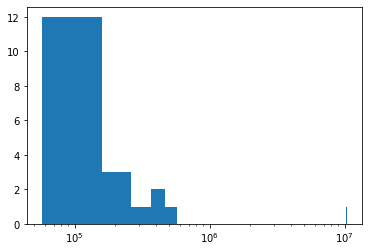

In [12]:
plt.hist(ser_sort.head(20).values, bins=100);
plt.xscale('log')

Корреляцию между категориальными переменными и целевой переменной считаем по как коэффициент корреляции Крамера V для категориальных переменных.  
Но есть вопрос: что делать с категориальными переменными, у которых одна категория?  
Первый вариант - не учитывать их совсем и второй вариант - заменить NaN строкой 'NaN'
и пусть будет второй категорией. Вполне возможно, что эта переменная имеет единственное категориальное значение "очень тесно" связанное с целевым значением.  
Кстати, возможно что надо учитывать такую возможность и для остальных категориальных
переменных, а не просто отбрасывать их.  
Может быть имеет смысл вычислять корреляцию для обоих вариантов, и брать наибольшую?  
Эта мысль и реализована ниже.  
Как видно из распечатки ниже, где-то значения равны, где-то различаются в одну или 
другую сторону, кое-где раздичаются более чем в 2 раза (Var218).  
[О том, как по умолчанию обрабатывается NaN](#NaN_crosstab)
<a id='NaN_crosstab_return'></a>

In [13]:
df_cat_cor = pd.DataFrame(0.0,  columns=['Corr'], index=['Var{}'.format(i) for i in  range(191, 230)])
lonecat = []
# Увеличение величины до 231 приводит к расчету для Label
for col in range(190, 230):
    ser = df_data.iloc[:, col]
    if not ser.isnull().all():
        c_v_0 = 0.00
        if np.sum(~pd.isnull(ser.unique())) > 1:
            c_v_0 = cramers_v( ser, df_data.Label)
        else:
            lonecat.append(df_data.columns[col])
        c_v_1 = cramers_v( ser.replace(np.NaN, "NaN"), df_data.Label)
        
        df_cat_cor.loc[df_data.columns[col], 'Corr'] = c_v_0
        info = '=' if round(c_v_0, 3) == round(c_v_1, 3) else '-' if c_v_1 < c_v_0 else '+'
        print('{0} {3:.3f} {4} (-NaN:{1:.3f} +NaN:{2:.3f}) {5}'.format(
            df_data.columns[col], c_v_0, c_v_1, max(c_v_0, c_v_1), info, 
            '{:.3f}'.format(max(c_v_0, c_v_1)/min(c_v_0, c_v_1)) if min(c_v_0, c_v_1) > 0. and info != '=' else ''
        ))
print('Категориальные переменные с одной категорией. ', lonecat)

Var191 0.013 + (-NaN:0.000 +NaN:0.013) 
Var192 0.118 + (-NaN:0.116 +NaN:0.118) 1.019
Var193 0.061 = (-NaN:0.061 +NaN:0.061) 
Var194 0.017 + (-NaN:0.010 +NaN:0.017) 1.758
Var195 0.021 = (-NaN:0.021 +NaN:0.021) 
Var196 0.009 = (-NaN:0.009 +NaN:0.009) 
Var197 0.035 = (-NaN:0.035 +NaN:0.035) 
Var198 0.000 = (-NaN:0.000 +NaN:0.000) 
Var199 0.237 = (-NaN:0.237 +NaN:0.237) 
Var200 0.043 - (-NaN:0.043 +NaN:0.000) 
Var201 0.017 + (-NaN:0.000 +NaN:0.017) 
Var202 0.000 = (-NaN:0.000 +NaN:0.000) 
Var203 0.009 + (-NaN:0.007 +NaN:0.009) 1.229
Var204 0.048 = (-NaN:0.048 +NaN:0.048) 
Var205 0.073 - (-NaN:0.073 +NaN:0.072) 1.020
Var206 0.082 + (-NaN:0.077 +NaN:0.082) 1.058
Var207 0.055 = (-NaN:0.055 +NaN:0.055) 
Var208 0.010 + (-NaN:0.008 +NaN:0.010) 1.214
Var210 0.047 = (-NaN:0.047 +NaN:0.047) 
Var211 0.032 = (-NaN:0.032 +NaN:0.032) 
Var212 0.075 = (-NaN:0.075 +NaN:0.075) 
Var213 0.015 + (-NaN:0.000 +NaN:0.015) 
Var214 0.043 - (-NaN:0.043 +NaN:0.000) 
Var215 0.001 + (-NaN:0.000 +NaN:0.001) 
Var216 0.0

In [14]:
# Отсортируем расчитанные коэффициенты корреляции 
# между категориальными переменными и целевой переменной
df_cat_cor.sort_values(by= 'Corr', inplace=True, ascending = False)
df_cat_cor

,Corr
Var199,0.237375
Var192,0.116264
Var216,0.083442
Var206,0.077436
Var212,0.075150
Var205,0.073484
Var228,0.070617
Var193,0.060861
Var207,0.055418
Var227,0.054255


In [15]:
# Категориальные переменные с одной категорией, как видно из выборки ниже
# не коррелируются с целевой переменной.
df_cat_cor.loc[lonecat]

,Corr
Var191,0.0
Var213,0.0
Var215,0.0
Var224,0.0


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [16]:
# Подговим набор из 20 целочисленных переменных с наибольшей корреляцией 
# и целевым значением.
df4 = df_data[ser_sort.head(20).index.tolist() + ['Label']]

In [21]:
def plot_df(df, title, figsize):

    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title)
    for num, col in enumerate(df.columns[:-1]):
        plt.subplot(len(df.columns[:-1])//2, 2, num+1)
        plt.hist(df[df['Label'] ==  1][col], bins=25, alpha=0.6, label='отток', color='r')
        plt.hist(df[df['Label'] == -1][col], bins=25, alpha=0.4, label='не отток', color='g')
        plt.legend(loc='upper right')
        plt.title(col)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    plt.subplots_adjust(top=0.94);

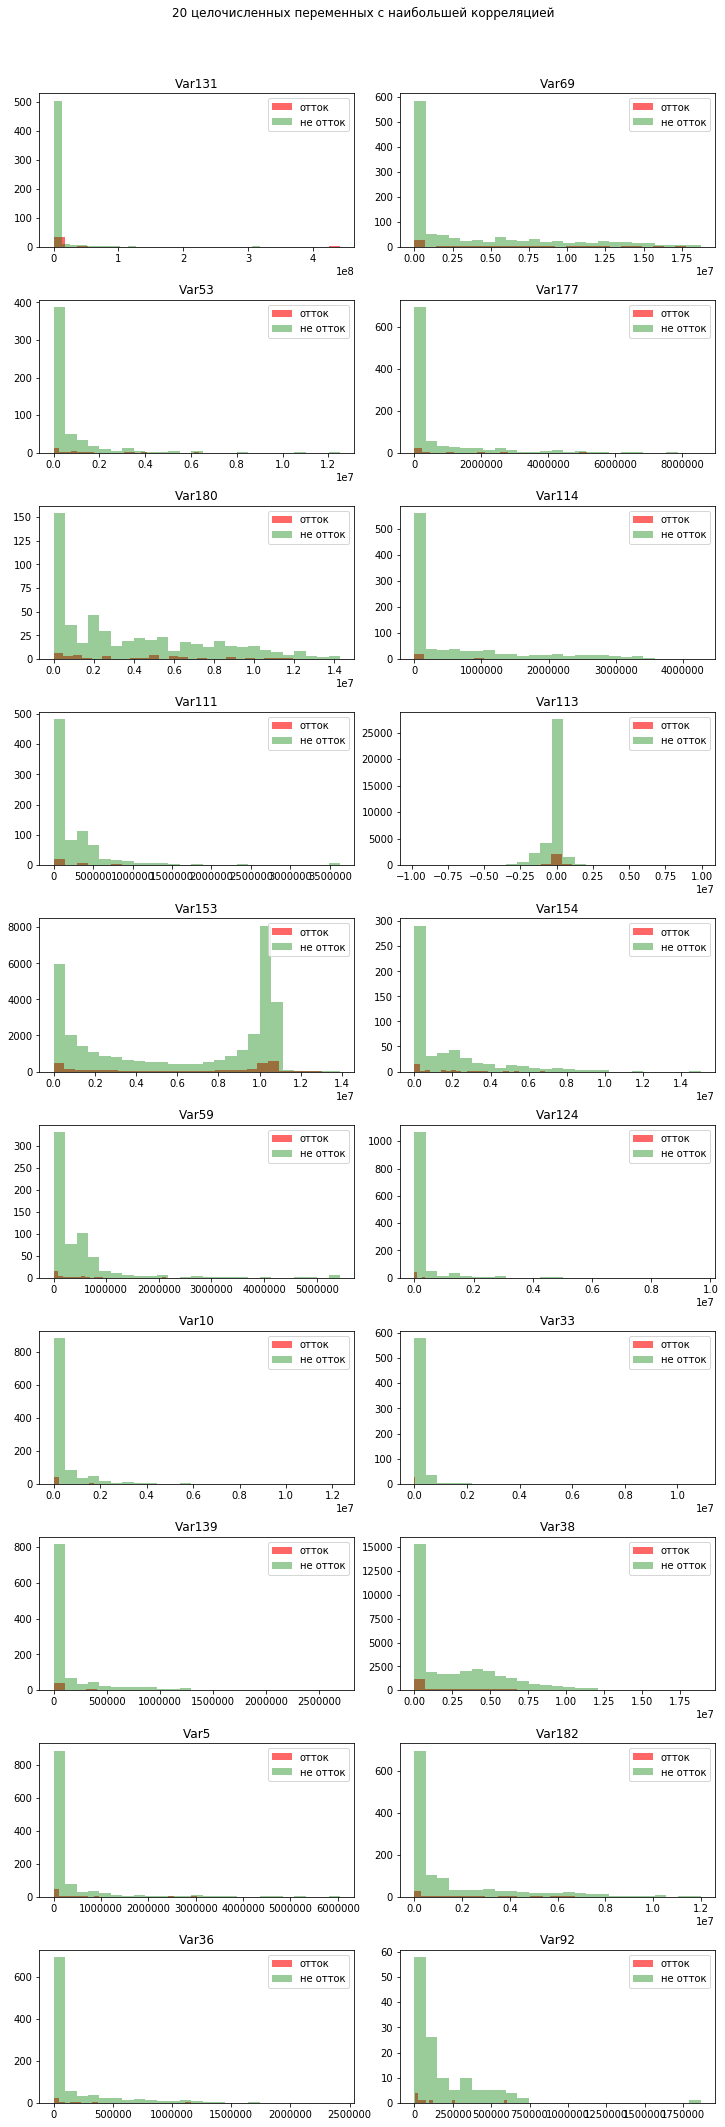

In [23]:
plot_df(df4, '20 целочисленных переменных с наибольшей корреляцией', (10, 30))

/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


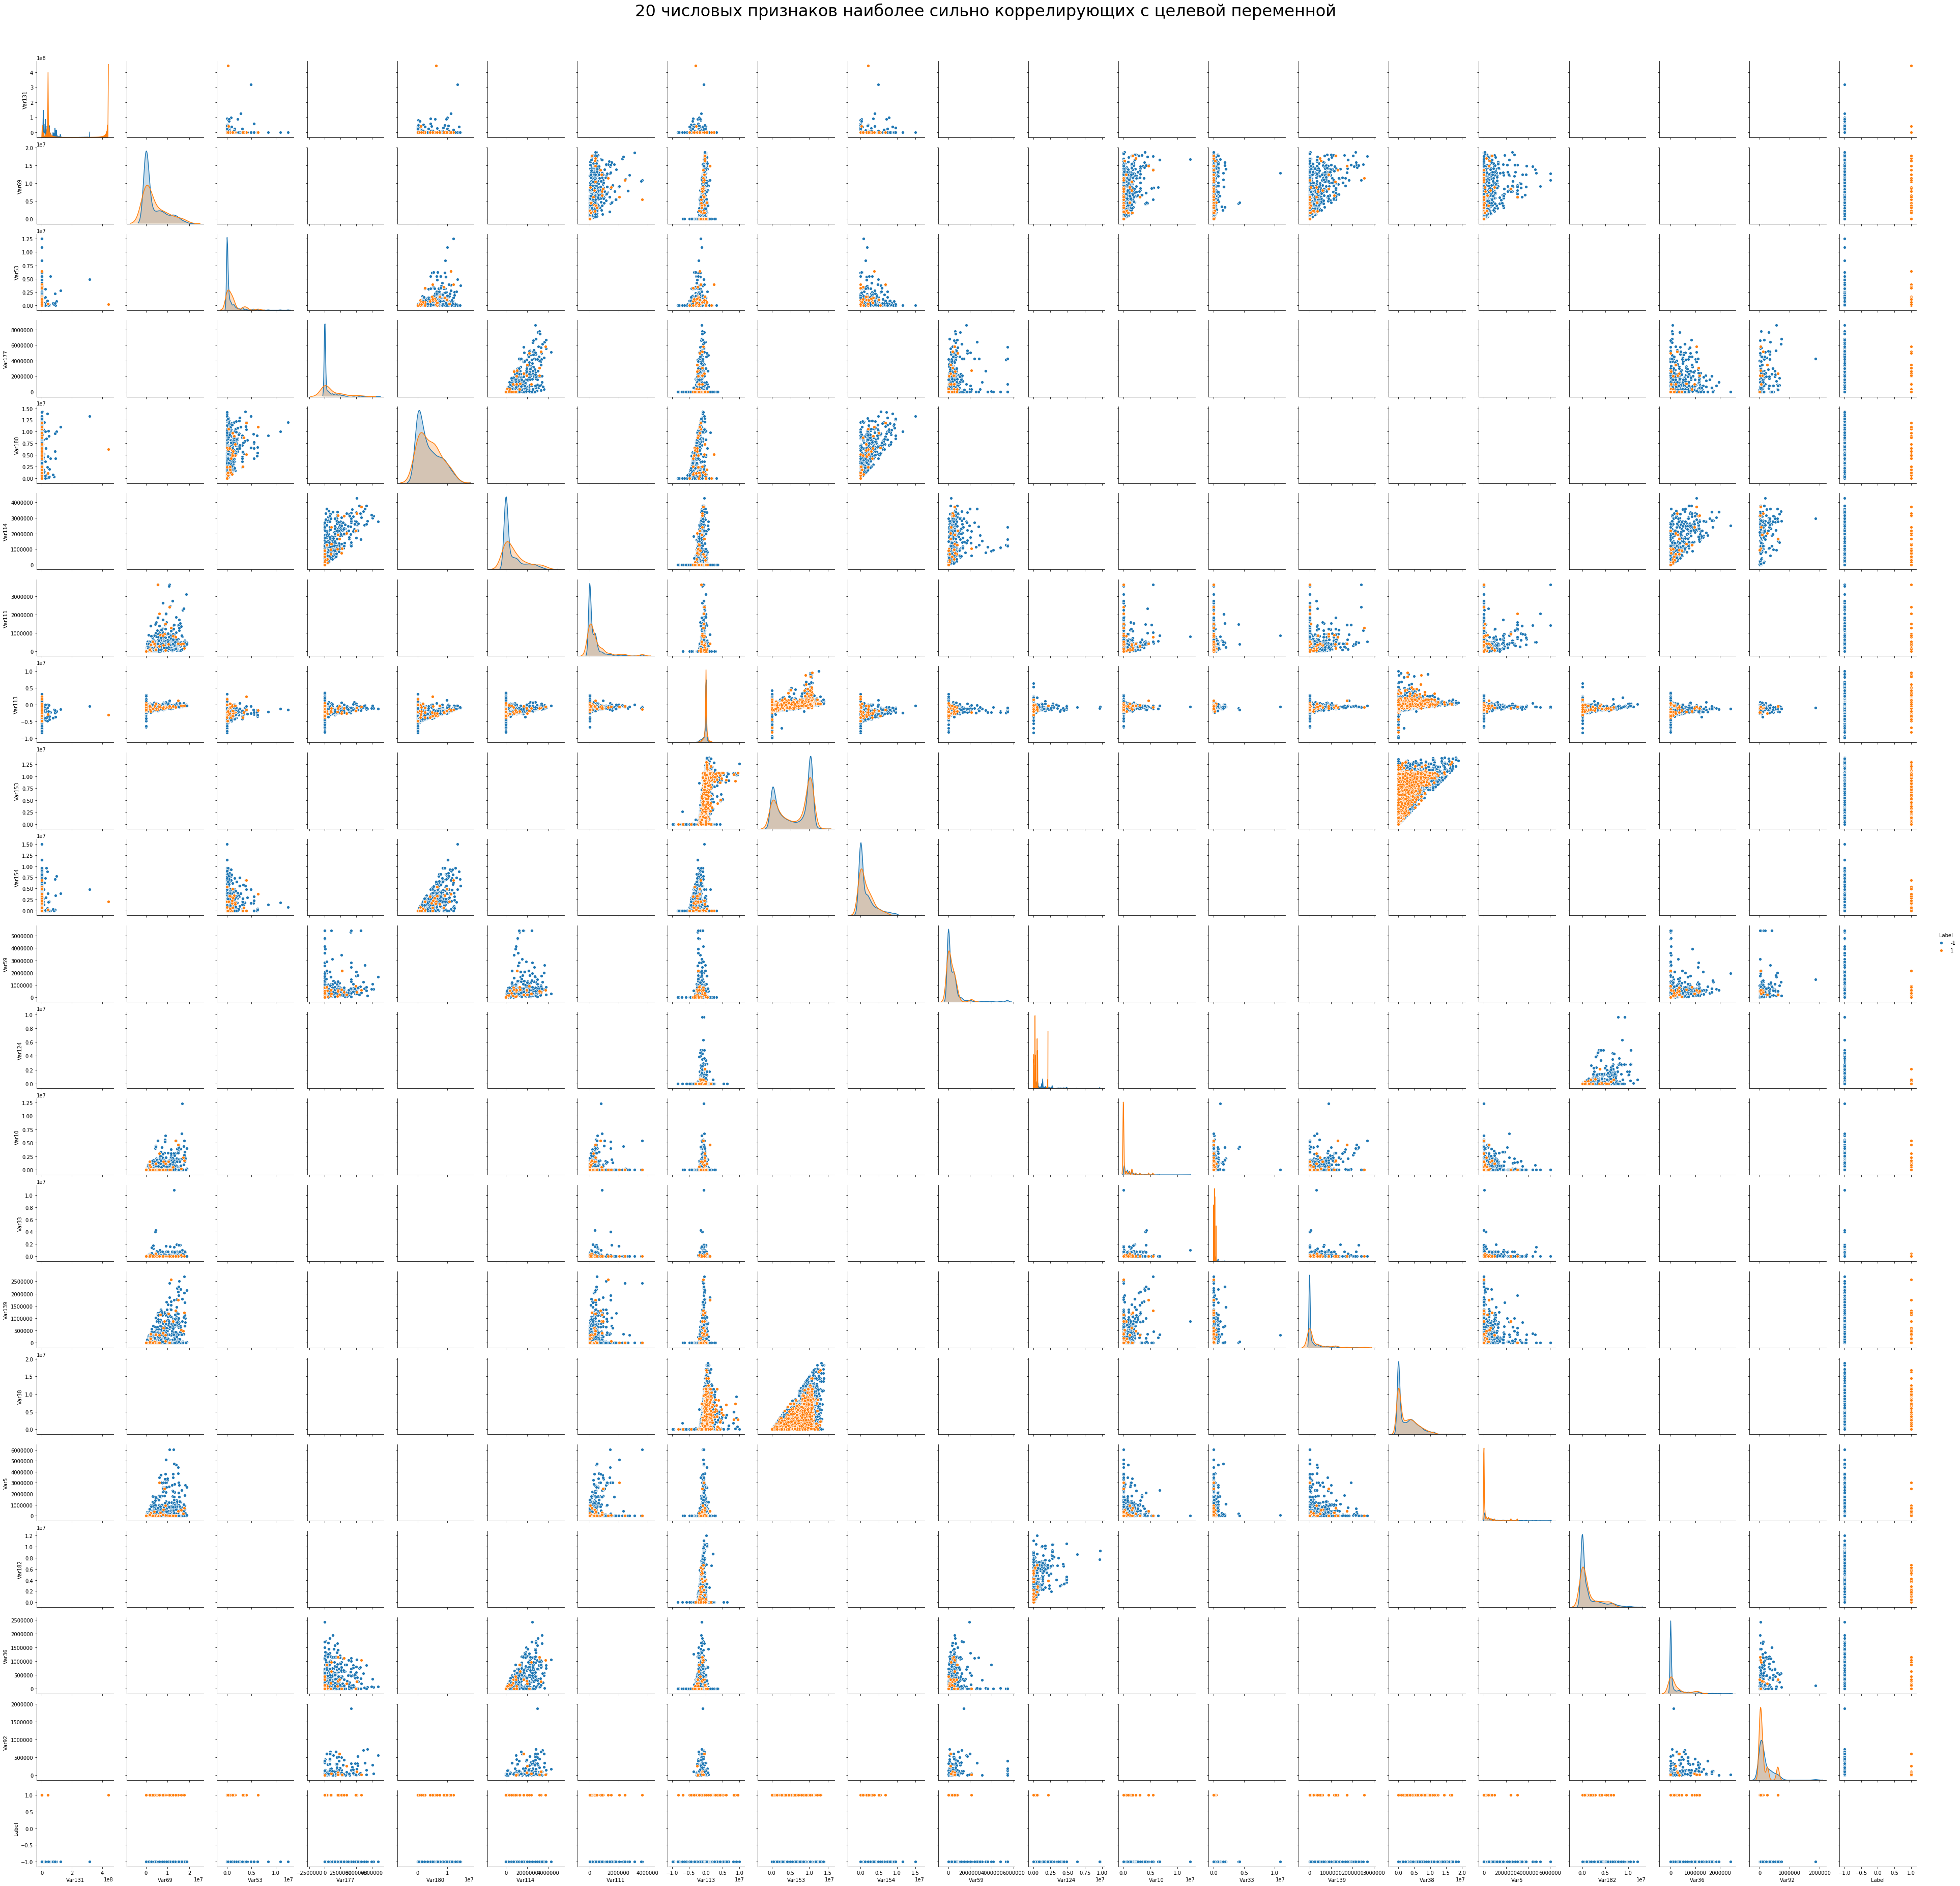

In [24]:
# Отображение топ 20 числовых признаков наиболее сильно коррелирующих с целевой переменной
# в координатах пар признаков
 
gr = pairplot(df4, hue='Label')
gr.fig.suptitle("20 числовых признаков наиболее сильно коррелирующих с целевой переменной", size=32)
gr.fig.subplots_adjust(top=0.95);

5. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [25]:
# Случайная выборка из диапазона 0-190, за исключением N переменных, 
# выбранных в предшествующем пункте
# df_tmp создан ранее из целочисленных параметров и целевого значения, в котором 
# отброшены столбцы в которых все значения NaN, и для интереса отображения
# тсключим параметры у которых
# минимальное значение равно 25%, равно 50% и равно 75% значениям
# вряд ли такие параметры будут информативны, хотя разница мат. ожиданий
# у них может быть большая, и будет решено, что они сильно коррелированны с целевым
# значением. Как помним, таких переменных - 46
excludecolumn = ser_desc.index.tolist() + df4.columns.tolist()
column_5 = random.sample( [x for x in df_tmp.columns[:-1].tolist() if x not in excludecolumn], 10)
df5 = df_data[column_5 + ['Label']]
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
Var149    34184 non-null float64
Var128    871 non-null float64
Var6      35565 non-null float64
Var91     890 non-null float64
Var136    563 non-null float64
Var76     35984 non-null float64
Var103    1165 non-null float64
Var126    28892 non-null float64
Var186    570 non-null float64
Var57     40000 non-null float64
Label     40000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 3.4 MB


In [26]:
# Посмотрим на характер выбранных случайно переменных
df5.describe()

,Var149,Var128,Var6,Var91,Var136,Var76,Var103,Var126,Var186,Var57,Label
count,3.418400e+04,871.000000,35565.000000,890.000000,5.630000e+02,3.598400e+04,1165.000000,28892.000000,570.000000,40000.000000,40000.000000
mean,2.981702e+05,90.983927,1319.915394,90.791011,1.141359e+05,1.488972e+06,19.774249,-0.569916,3.515789,3.505965,-0.851200
std,6.740713e+05,318.537531,2609.955770,369.315390,1.912296e+05,1.841328e+06,94.658291,22.501328,9.412473,2.028858,0.524848
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-32.000000,0.000000,0.000214,-1.000000
25%,0.000000e+00,0.000000,518.000000,0.000000,5.290410e+03,8.930800e+04,0.000000,-20.000000,0.000000,1.728263,-1.000000
50%,5.191550e+04,28.000000,854.000000,28.000000,5.012520e+04,8.896040e+05,0.000000,4.000000,0.000000,3.502884,-1.000000
75%,4.175412e+05,98.000000,1435.000000,84.000000,1.366518e+05,2.302978e+06,14.000000,10.000000,6.000000,5.264473,-1.000000
max,1.693440e+07,7147.000000,131761.000000,9404.000000,1.209600e+06,1.935360e+07,2002.000000,68.000000,102.000000,7.000000,1.000000


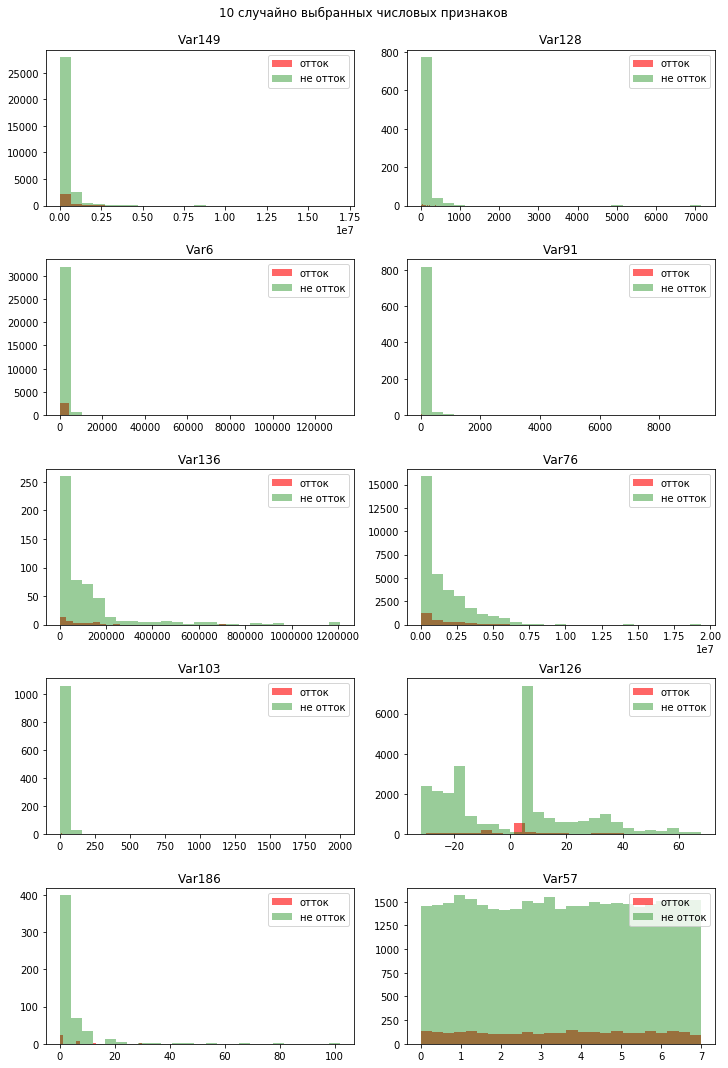

In [27]:
plot_df(df5, '10 случайно выбранных числовых признаков', (10, 15))

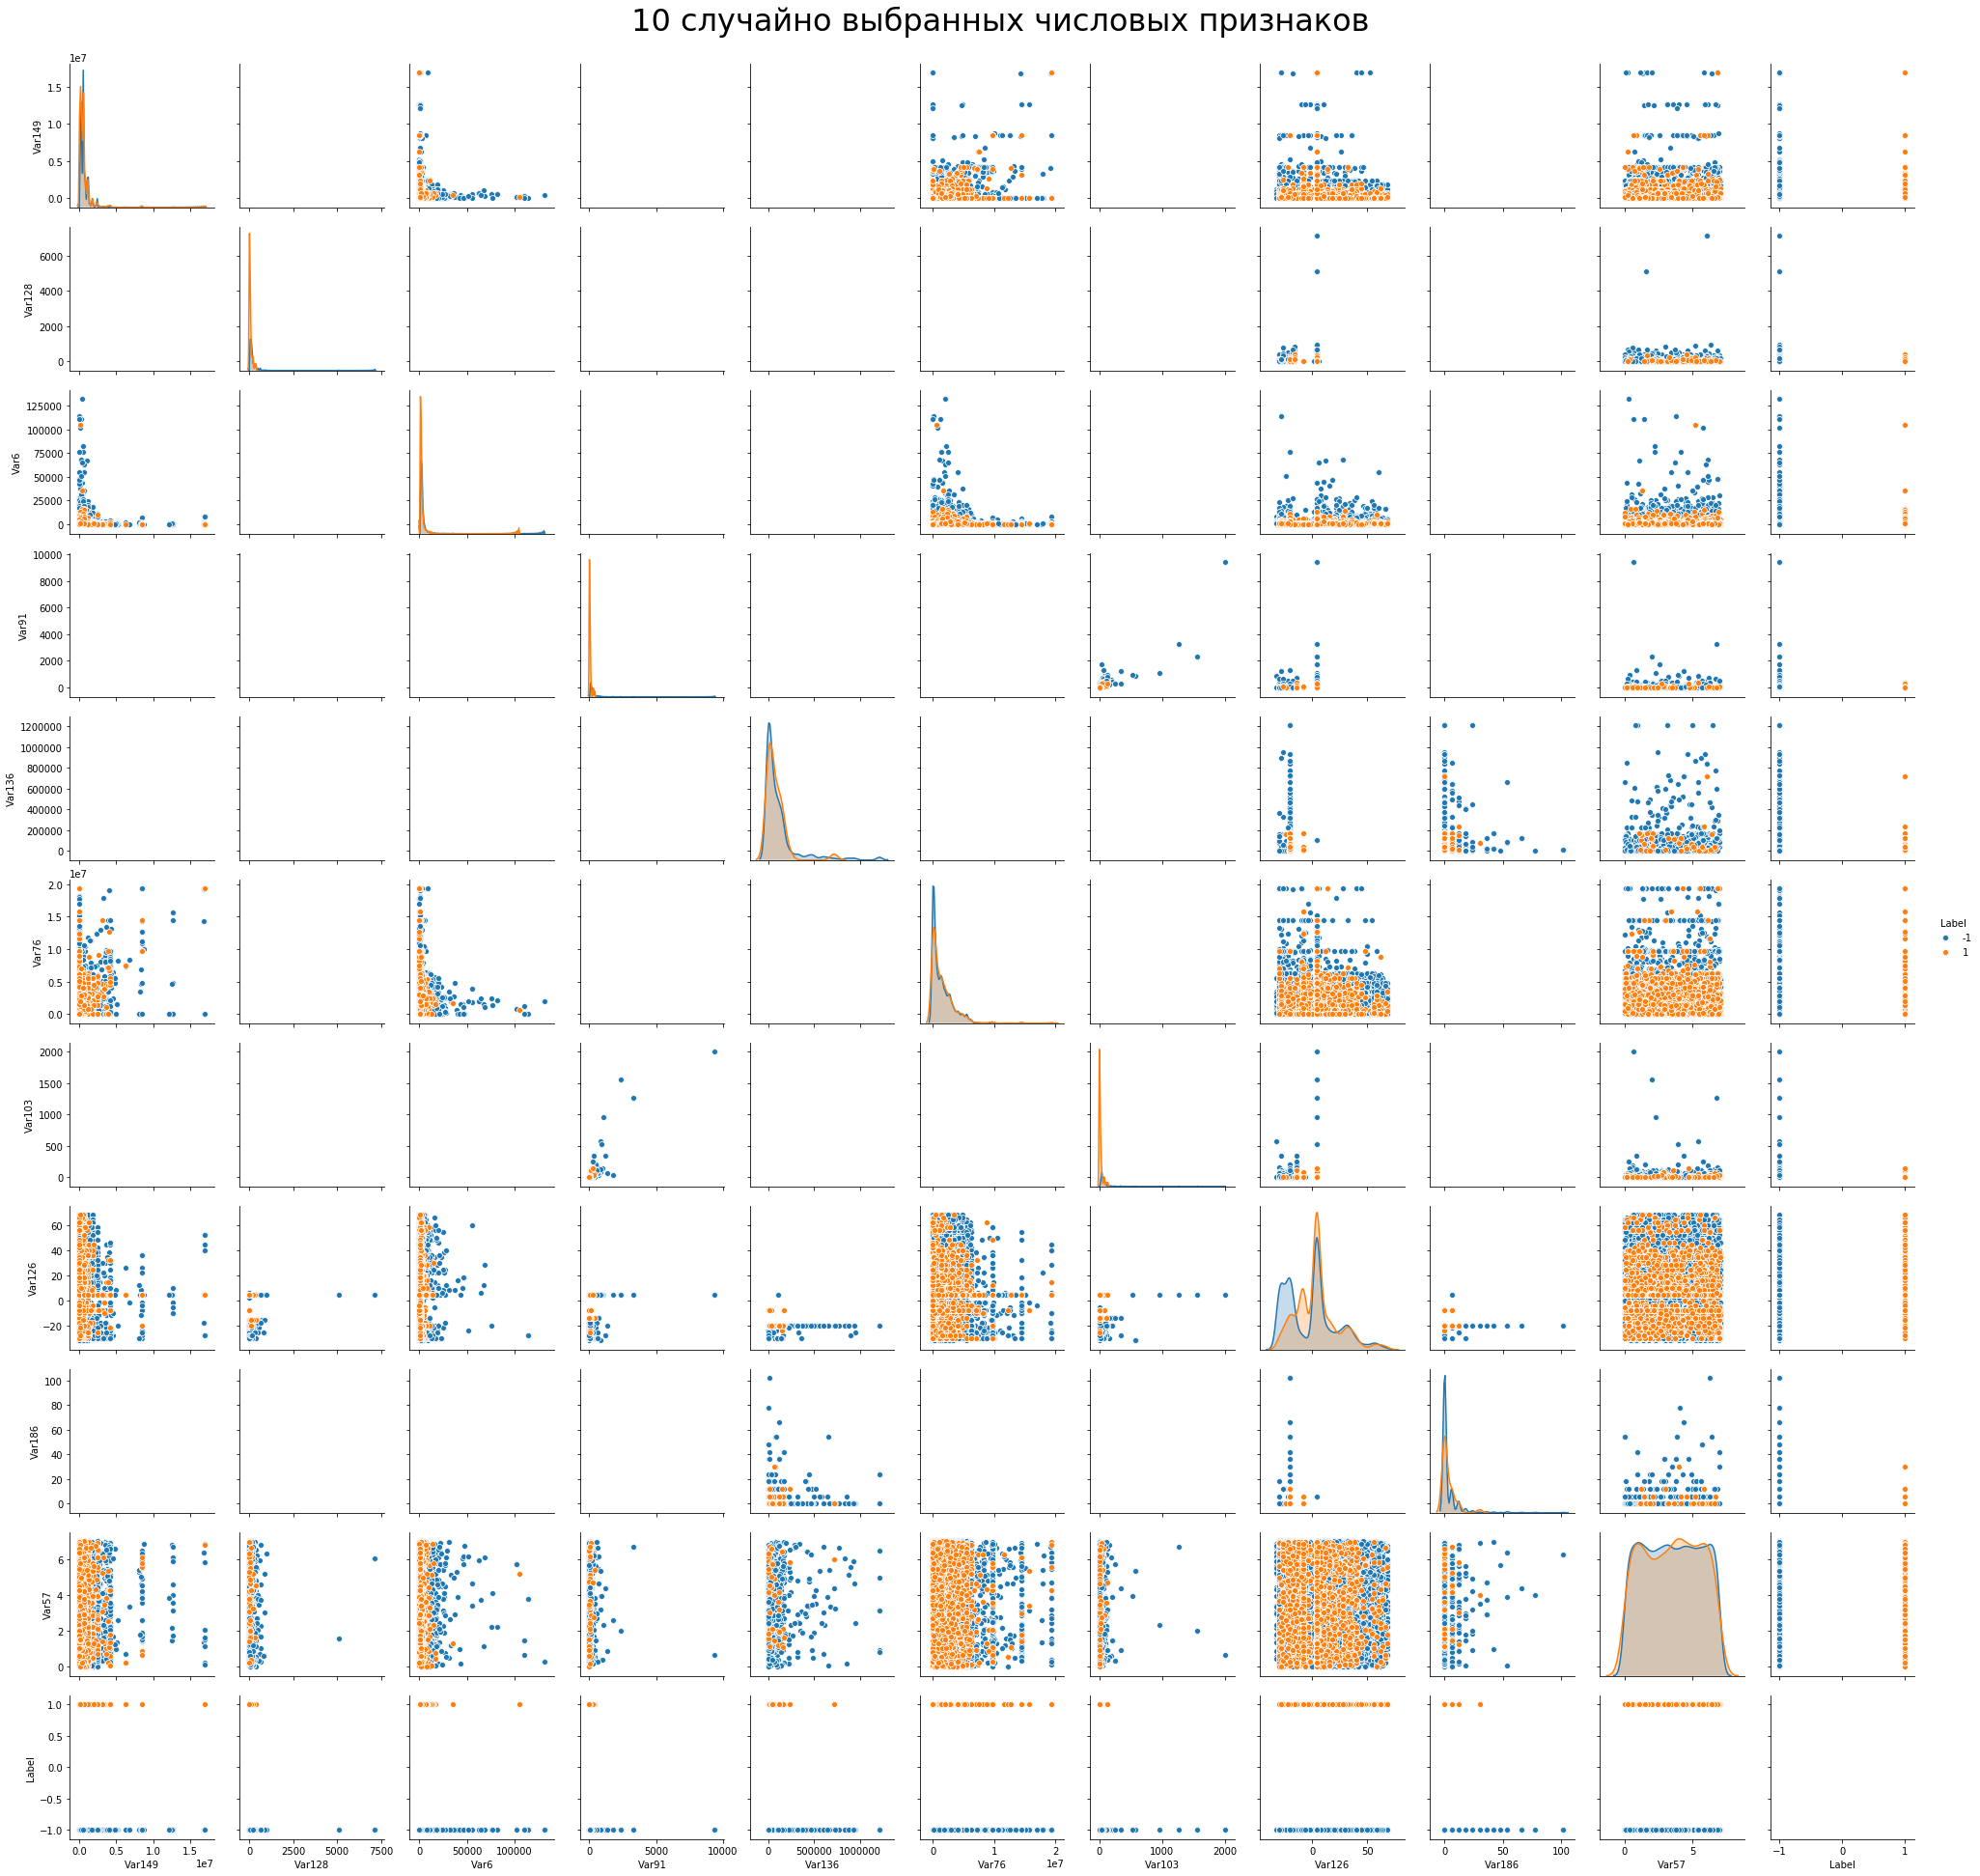

In [28]:
# Отображение 10 случайно выбранных числовых признаков
# в координатах пар признаков
gr = pairplot(df5, hue='Label')
gr.fig.suptitle("10 случайно выбранных числовых признаков", size=32)
gr.fig.subplots_adjust(top=0.95);

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [55]:
# Посмотрим на характер 10 числовых признаков, 
# наименее сильно коррелирующих с целевой переменной.
df6 = df_data[ser_sort.tail(10).index.tolist() + ['Label']]
df6.describe().transpose().drop('Label')

,count,mean,std,min,25%,50%,75%,max
Var181,35984.0,0.610633,2.492228,0.0,0.0,0.0,0.0,49.0
Var29,570.0,0.017544,0.186658,0.0,0.0,0.0,0.0,2.0
Var26,1165.0,0.069528,0.530325,0.0,0.0,0.0,0.0,9.0
Var4,1275.0,0.148235,1.396054,0.0,0.0,0.0,0.0,27.0
Var116,570.0,0.073684,0.464760,0.0,0.0,0.0,0.0,3.0
Var2,1006.0,0.004970,0.157642,0.0,0.0,0.0,0.0,5.0
Var173,35984.0,0.006781,0.132355,0.0,0.0,0.0,0.0,6.0
Var44,35984.0,0.167574,1.659588,0.0,0.0,0.0,0.0,135.0
Var138,1275.0,0.001569,0.056011,0.0,0.0,0.0,0.0,2.0
Var118,140.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


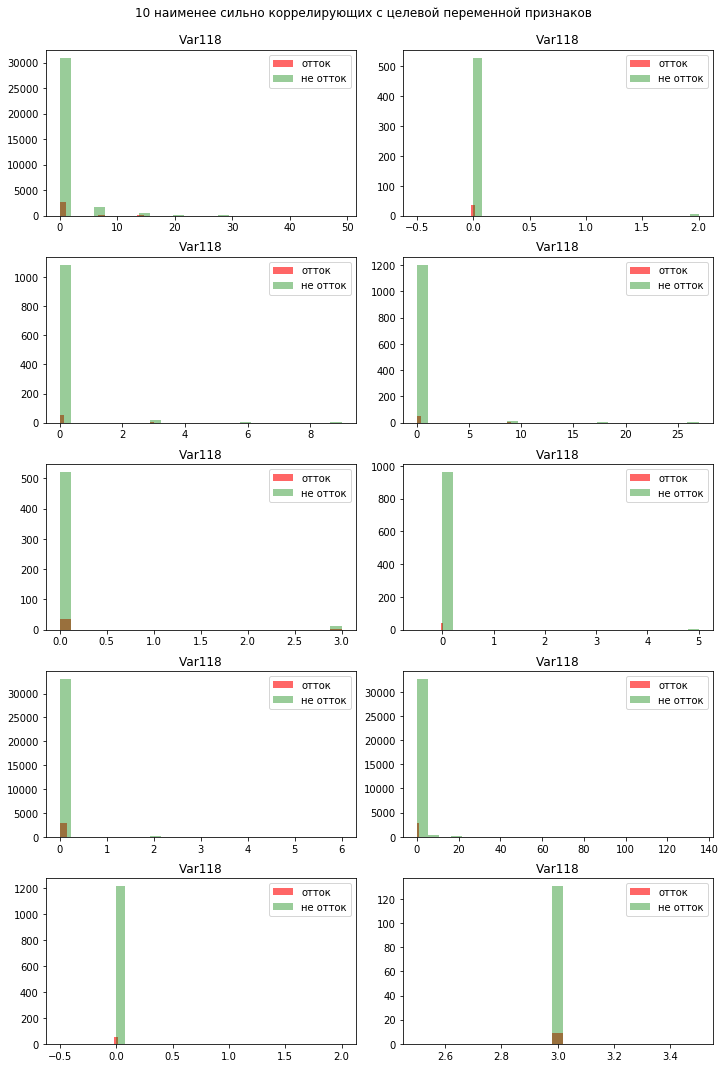

In [148]:
plot_df(df6, '10 наименее сильно коррелирующих с целевой переменной признаков', (10, 15))

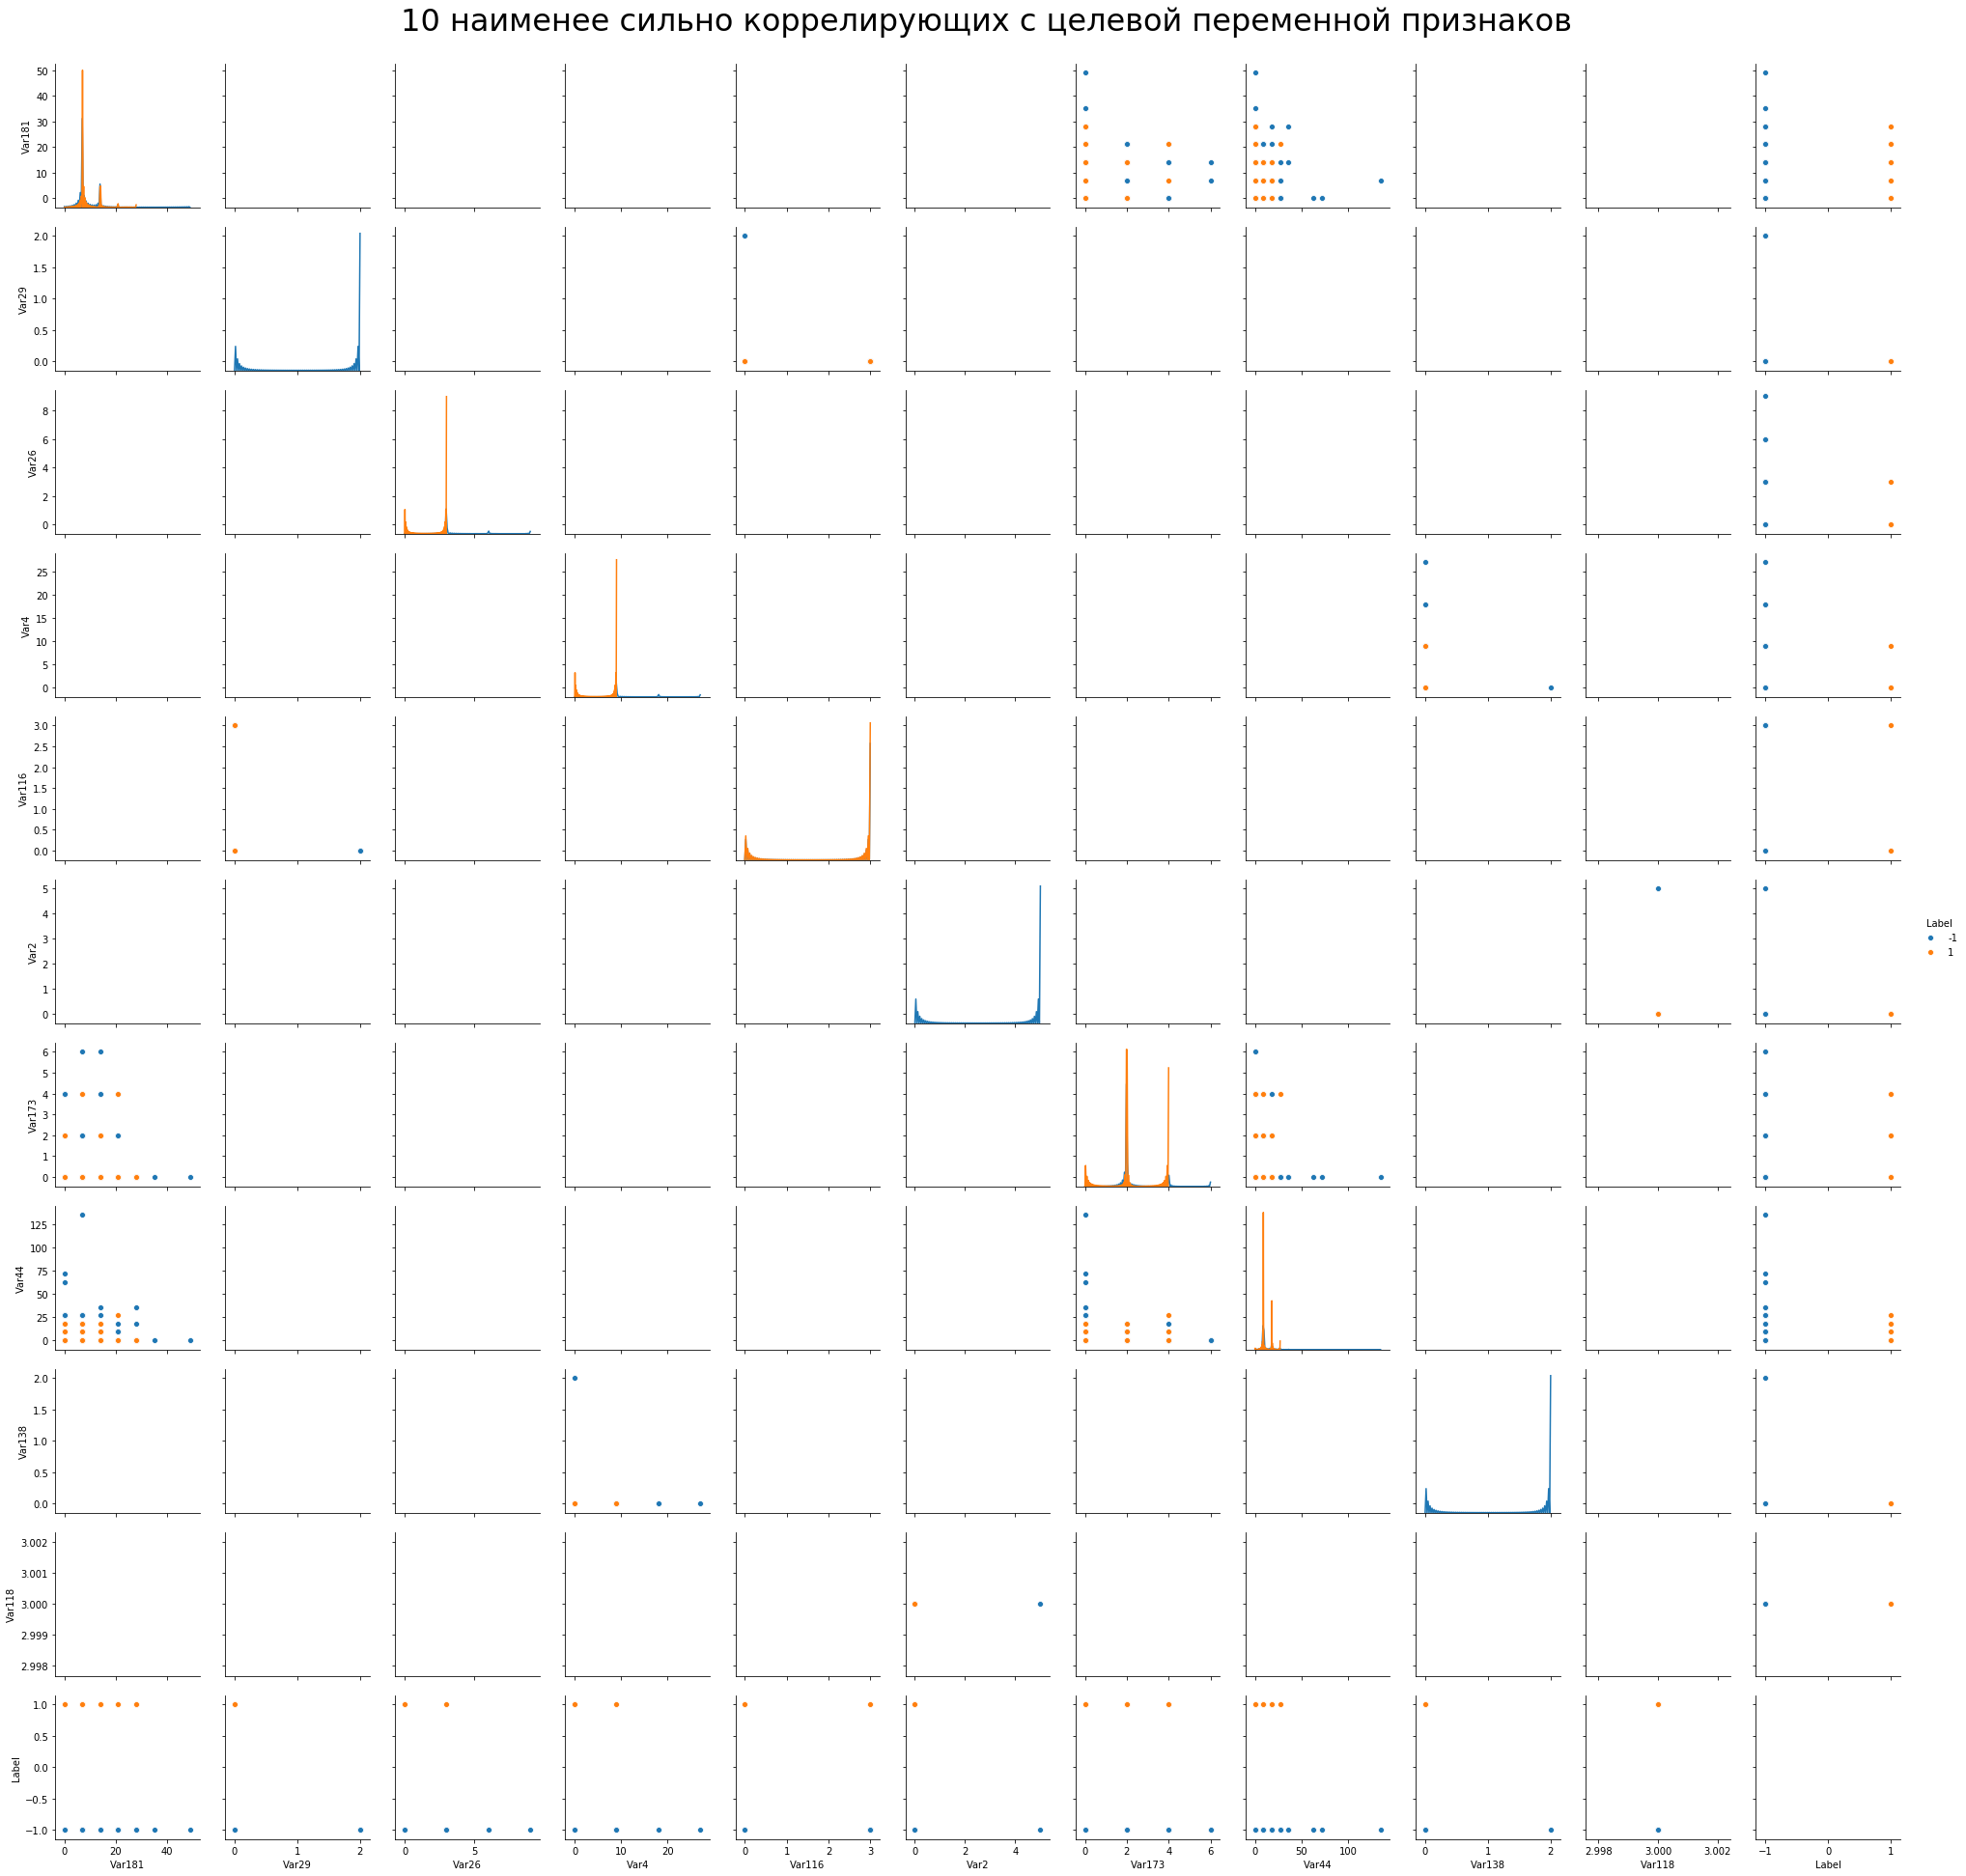

In [59]:
# Отображение 10 наименее сильно коррелирующих с целевой переменной признаков
# в координатах пар признаков
gr = pairplot(df6, hue='Label')
gr.fig.suptitle("10 наименее сильно коррелирующих с целевой переменной признаков", size=32)
gr.fig.subplots_adjust(top=0.95);

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

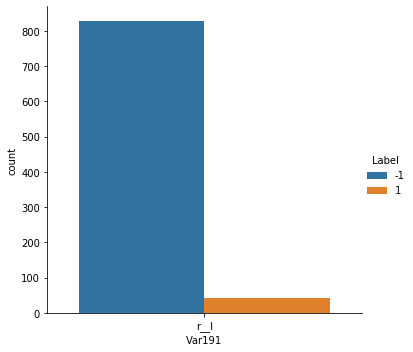

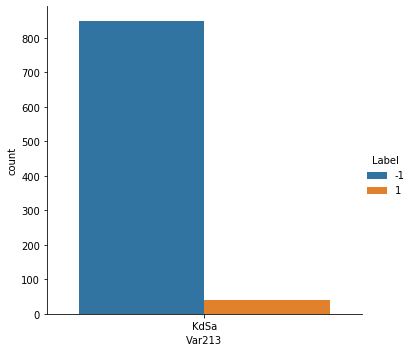

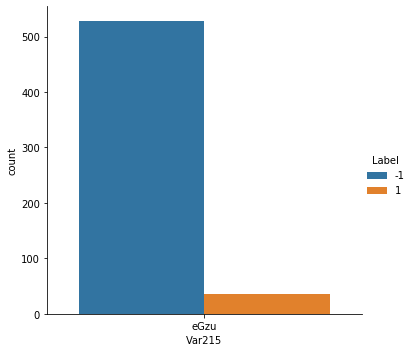

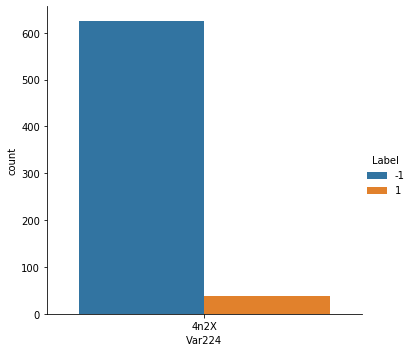

In [29]:
# Категориальные переменные с одной категорией.  
label_show = ['Var191', 'Var213', 'Var215', 'Var224']
for v in label_show:
    sns.catplot(x=v,  data=df_data, hue="Label", kind="count");

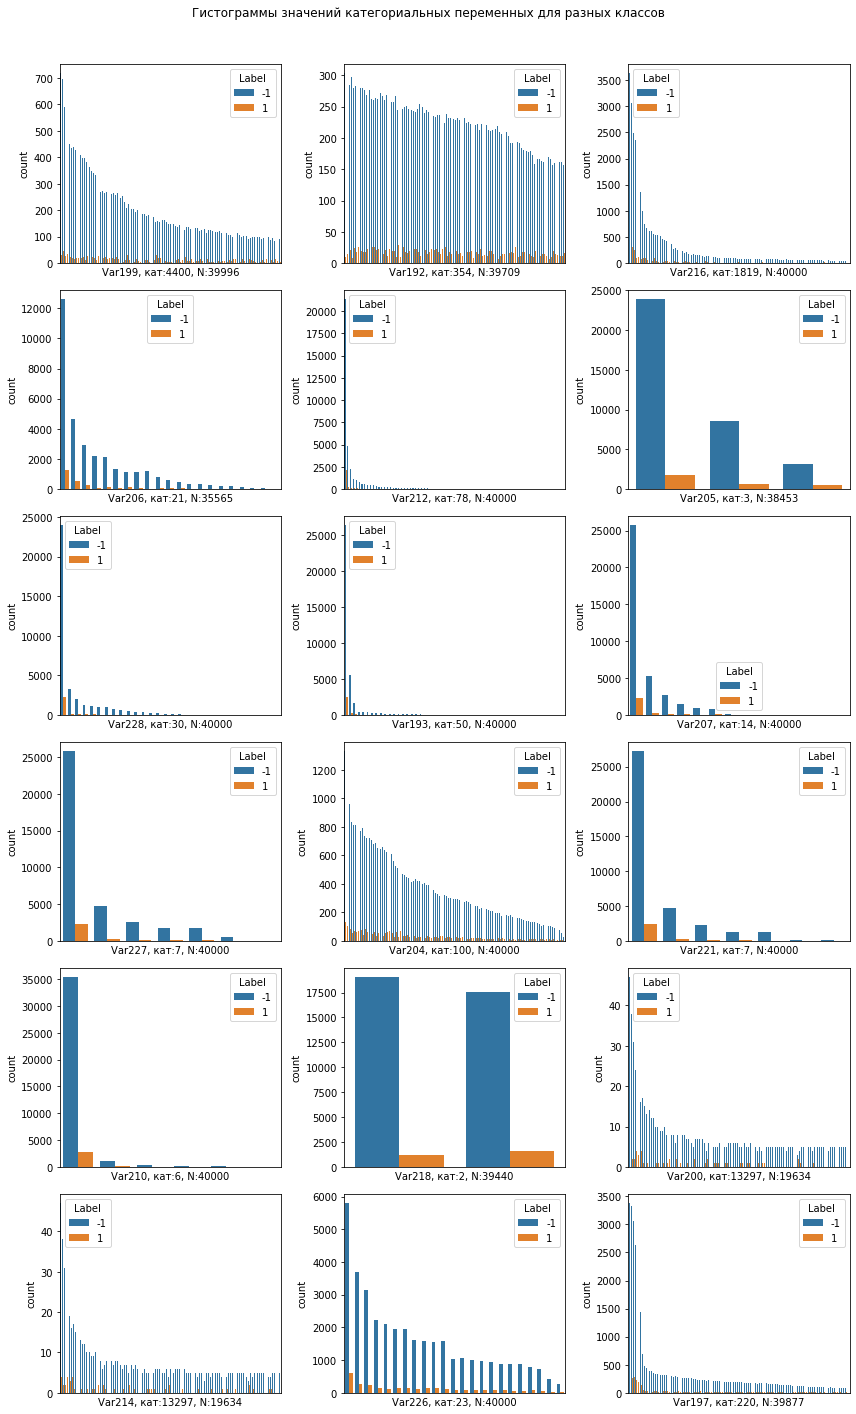

In [35]:
# Построение гистограмм значений категориальных переменных для разных классов.
# Построение выполнено для n_par переменных. При этом на гистограммах ограничено
# количество отображаемых категорий. Отображается не более 100 наиболее больших категорий. 
# На оси X в подписи указано количество категорий переменной и количество значений.
# Порядок отображения переменных - от переменных с наибольщей корреляцией к меньшей.

n_par = 18
fig, ax =plt.subplots(n_par // 3, 3,  figsize=(12, 20))
fig.set_figwidth(12)
fig.suptitle('Гистограммы значений категориальных переменных для разных классов')
for i, v in enumerate(df_cat_cor.iloc[:n_par].index):
    ax_cur = ax[i//3, i%3]
    g = sns.catplot(x=v,  data=df_data, hue="Label", kind="count", 
               order=df_data[v].value_counts().iloc[:100].index,  ax=ax_cur)
    ax_cur.set_xticks([])
    ax_cur.set_xlabel('{}, кат:{}, N:{}'.format(v, len(df_data[v].dropna().unique()), df_data[v].count() ))
    plt.close(g.fig)


fig.tight_layout()
plt.subplots_adjust(top=0.94);

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?


Наименее полезными переменными будут полностью пустые, категориальные переменные с одной категорией, переменные у которых у которых минимальное значение равно 25%, равно 50% и равно 75% значениям.
Кроме того, много переменных с малым количеством значений. Может быть имеет смысл отбрасывать переменне, которых менее некоторого порога (менее 50, или 70 процентов).

Думаю, что отбор признаков будет полезным для построения модели.